In [1]:
import sys
from pathlib import Path
main_dir = str(Path.cwd().parent)
if main_dir not in sys.path:
    sys.path.append(main_dir)
from environment.market import MarketEnv, ListConsumer, ImpulseConsumer
from tqdm import tqdm
import logging
from visualization.env_status import policy_plot
from models.MLP import SimpleBrokerDRL
from learning.reinforce import train
from learning.utils import EpisodeSession
import numpy as np
import torch

# Environment

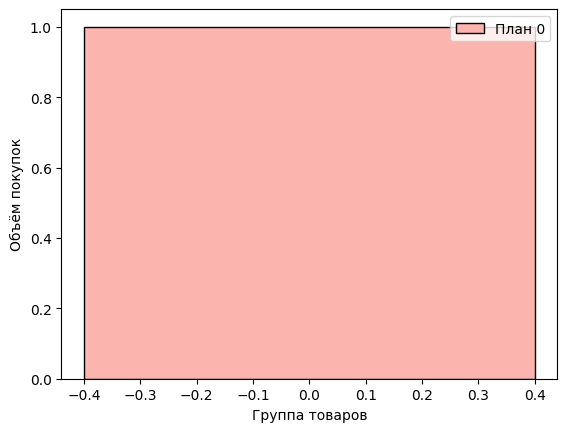

In [2]:
K_GROUPS = 1
K_CONS_GROUPS = 1
K_ADD_GROUPS = 2
K_ACTIONS = 6

cons_list = [ListConsumer(K_GROUPS, K_CONS_GROUPS),
             #ImpulseConsumer(K_GROUPS, K_ADD_GROUPS, add_budget=1, impulse_coef=1.7, impulse_base=0.)
             ]
env = MarketEnv(K_GROUPS, fix_stock=1000,k_actions=K_ACTIONS, consumer_list=cons_list, max_ep=10)
policy_plot(env)

In [3]:
from learning.reinforce import *

In [4]:
params = {
    'VERSION': 'List_test',
    'GAMMA': 0.95,
    'N_EPS': 20000,
    'REPORT': 500,
    'MONITOR': 1000,
    'LR': 1e-4,
    }

import torch.nn as nn
from torch.optim import Adam


policy=SimpleBrokerDRL(K_GROUPS, K_ACTIONS)
# Compute Huber loss
criterion = nn.SmoothL1Loss()
optimizer = Adam(policy.parameters(), lr=params['LR'])
device = "cpu"
memory = EpisodeSession()
cur_func = lambda x: x + 0.05
env.reset()

(array([1000.]), None)

In [5]:
N = 1
rs = []
for i in range(N):
    end = False
    reward = 0
    while not end:
        action = policy(torch.FloatTensor([env.state()[0]]))
        action = action.argmax(-1)
        _, r0, end, _ = env.step(action.tolist()[0])
        reward += r0
    rs.append(reward)
    env.reset()
print(f"{np.mean(rs):.2f} +- {np.std(rs) / np.sqrt(N):.2f} ")

7.00 +- 0.00 


/var/folders/1r/nr0_b6h93gnbrdl1p0899fsh0000gn/T/ipykernel_5936/510670461.py:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  action = policy(torch.FloatTensor([env.state()[0]]))


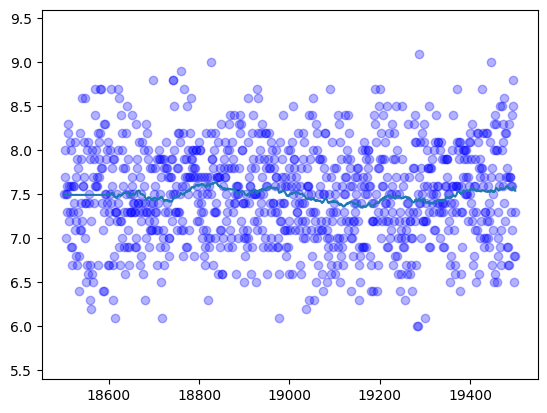

100%|██████████| 20000/20000 [00:56<00:00, 352.04it/s]


In [6]:
logging.basicConfig(format="%(asctime)s - %(message)s", stream=sys.stdout, level=logging.DEBUG)
train(env, policy, optimizer, memory, device, cur_func, params)

In [7]:
N = 200
rs = []
env.reset()
for i in range(N):
    env.stock = np.array([5.])
    end = False
    reward = 0
    while not end:
        _, r0, end, _ = env.step(action=[0]*K_GROUPS)
        reward += r0
    rs.append(reward)
    env.reset()
print(f"{np.mean(rs):.2f} +- {np.std(rs) / np.sqrt(N):.2f} ")

4.00 +- 0.00 


In [8]:
N = 1
rs = []
for i in range(N):
    end = False
    reward = 0
    while not end:
        action = policy(torch.FloatTensor([env.state()[0]]))
        action = action.argmax(-1)
        print(env.get_discount(action))
        _, r0, end, _ = env.step(action.tolist()[0])
        reward += r0
    rs.append(reward)
    env.reset()
print(f"{np.mean(rs):.2f} +- {np.std(rs) / np.sqrt(N):.2f} ")

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
5.00 +- 0.00 
